# Foundations of Computational Economics #44

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## Newton-Kantorovich method

<img src="_static/img/lecture.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/mRLxOWxqJbU](https://youtu.be/mRLxOWxqJbU)

Description: Solving Bellman equation using Newton-Kantorovich iterations. Convergence rates. Polyalgorithm.

We have seen that different solution methods can differ drastically in their numerical performance:

- VFI is simple to implement, global convergence, but the rate depends on the modulus of contraction  
- Time iterations though theoretically equivalent, converge faster  
- Policy iterations can converge much much faster  


Newton-Kantorovich iterations is one more solution method: it adopts Newton-Raphson algorithm
to find the fixed point on Bellman operator, and is therefore very fast as well

### Leonid Vitalievich Kantorovich, 1912-1986

<img src="_static/img/kantorovich.jpg" style="height:200px;">

- Russian mathematician and economist, Leningrad/St.Petersburg, Novosibirsk  
- Linear programming (see video 18) together with George Danzig  
- Functional analysis: theoretical and numerical results  
- 1975 Nobel prize for contributions to the theory of optimum allocation of resources, shared with Tjalling Koopmans  


[https://en.wikipedia.org/wiki/Leonid_Kantorovich](https://en.wikipedia.org/wiki/Leonid_Kantorovich)

### Kantorovich contribution

📖 L. V. Kantorovich 1948 “Functional analysis and applied mathematics”, Uspekhi Mat. Nauk

- application of functional analysis in numerical applications (in multiple works from 1937)  
- built general approximation theory for solving functional equations  
- generalized gradient descend and Newton methods for functional equations  
- results on existence of solution to the approximated equation, convergence of approximated solutions to the true one, rates and error bounds of this approach  

### Kantorovich theorem

- operator $ F: X \rightarrow X $ maps Banach space $ X $ to itself  
- to solve functional equation  


$$
F(x) = 0
$$

- form the sequence of approximate solutions $ x_0, x_1, \dots $ such that  


$$
x_{k+1} = x_k - F'(x_k)^{-1} F(x_k)
$$

### Kantorovich theorem

Let $ F $ be twice continuously differentiable on a ball $ B = \{x: ||x-x_0|| \le r\} $, linear operator $ F'(x_0) $ is invertible,
$ ||F'(x_0)^{-1}F(x_0)|| \le \eta $, $ ||F'(x_0)^{-1}F''(x)|| \le K, \, x\in B $, and

$$
h = K \eta < \tfrac{1}{2}, \;\; r \ge \frac{1-\sqrt{1-2h}}{h} \eta.
$$

Then the equation $ F(x)=0 $ has a solution $ x^\star \in B : F(x^\star)=0 $, and the sequence given by the Newton step converges to
$ x^\star $ with the quadratic rate

$$
||x_k - x^\star|| \le \frac{\eta}{h 2^k}(2h)^{2^k}
$$

### NK iterations in dynamic modeling

- solution of a dynamic model *in infinite horizon* is given by the fixed point of the Bellman operator  


$$
T(V)(x) = \max_{a} \big[ U(x,a) + \beta \mathbb{E}\big\{ V(x') \big| x,a \big\} \big]
$$

- we can apply Newton-Kantorovich method to solve the equation  


$$
T(V)(x) - V(x) = 0
$$

- **quadratic convergence** as compared to the linear convergence of successive approximating VFI solver  
- requires to code the *(Fréchet) derivative of Bellman operator* (derivative defined on Banach spaces)  

#### Rust model of bus engine replacement

Application: Optimal Replacement of GMC Bus Engines: An Empirical Model of Harold Zurcher (📖 John Rust 1987, Econometrica)

- Recall: video 28 for the setup, video 29 for implementation  
- Choice to *keep* or *replace* the engine on the bus, conditional on the observed mileage and unobserved (by econometrician) other information  
- Infinite horizon, discrete time  
- Mileage process is discretized, band diagonal transition probability matrix estimated from the data directly  

### Transition matrix for mileage

- If not replacing ($ d=0) $  


$$
\Pi_{n \times n} =
\begin{pmatrix}
\theta_{20} & \theta_{21} & \theta_{22} & 0 & \cdot & \cdot & \cdot & 0 \\
0 & \theta_{20} & \theta_{21} & \theta_{22} & 0 & \cdot & \cdot & 0 \\
0 & 0 &\theta_{20} & \theta_{21} & \theta_{22} & 0 & \cdot & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
0 & \cdot & \cdot & 0 & \theta_{20} & \theta_{21} & \theta_{22} & 0 \\
0 & \cdot & \cdot & \cdot & 0 & \theta_{20} & \theta_{21} & \theta_{22} \\
0 & \cdot & \cdot & \cdot & \cdot  & 0 & \theta_{20} & 1-\theta_{20} \\
0 & \cdot & \cdot & \cdot & \cdot & \cdot  & 0 & 1
\end{pmatrix}
$$

- If replacing ($ d=1 $), transition probabilities are given by the first row  

### Zurcher’s preferences

Instantaneous payoffs are given by the cost function that depends on the choice

$$
u(x_{t},d_t,\theta_1)=\left \{
\begin{array}{ll}
    -RC-c(0,\theta_1) & \text{if }d_{t}=\text{replace}=1 \\
    -c(x_{t},\theta_1) & \text{if }d_{t}=\text{keep}=0
\end{array} \right.
$$

- $ RC $ = replacement cost  
- $ c(x,\theta_1) $ = cost of maintenance with preference parameters $ \theta_1 $  

### Three independence assumptions for the error term

1. Error terms are **independent across observations** due to random sampling  
1. Error terms come in pairs, one for each decision $ d=0 $ and $ d=1 $, and are **independent across choices**  
1. Conditional on mileage $ x $, there is no serial correlation in error terms **across time**  

### Bellman equation

$$
V(x,\varepsilon) = \max_{d\in \{0,1\}} \big\{ u(x,\varepsilon_d,d) + \beta \mathbb{E}\big[ V(x',\varepsilon')\big|x,\varepsilon,d\big] \big\}
$$

$$
V(x,\varepsilon) = \max_{d\in \{0,1\}} \big\{ u(x,\varepsilon_d,d) + \beta
\int_{X} \int_{\Omega} V(x',\varepsilon') p(x',\varepsilon'|x,\varepsilon,d) dx'd\varepsilon' \big\}
$$

where $ \varepsilon_d $ is the component of vector $ \varepsilon \in \mathbb{R}^2 $ which corresponds to $ d $

### Rust assumptions

**(AS)** Additive separability in preferences

$$
u(x,\varepsilon_d,d) = u(x,d) + \varepsilon_d,
$$

**(CI)** Conditional independence

$$
p(x',\varepsilon'|x,\varepsilon,d) = q(\varepsilon'|x')\cdot \pi(x'|x,d)
$$

**(EV)** Extreme value Type I (EV1) distribution of $ \varepsilon $

### What Rust assumptions allow:

$$
V(x,\varepsilon) = \max_{d\in \{0,1\}} \big\{ u(x,d) + \varepsilon_d + \beta
\int_{X} \int_{\Omega} V(x',\varepsilon') \pi(x'|x,d) q(\varepsilon'|x') dx' d\varepsilon' \big\}
$$

1. Separate out the deterministic part of **choice specific value function** $ v(x,d) $ (SA)  
1. Compute the expectation by part (CI)  
1. Use max-stability of EV1 to compute expectation w.r.t. $ \varepsilon' $ (EV)  

$$
V(x,\varepsilon) = \max_{d\in \{0,1\}} \big\{ \underbrace{u(x,d) + \beta
\int_{X} \Big( \int_{\Omega} V(x',\varepsilon') q(\varepsilon'|x') d\varepsilon'\Big)
\pi(x'|x,d) dx'}_{v(x,d)}
+ \varepsilon_d \big\}
$$

$$
V(x',\varepsilon') = \max_{d\in \{0,1\}} \big\{ v(x',d) + \varepsilon'_d \big\}
$$

$$
\mathbb{E}\big[ V(x',\varepsilon')\big|x,d\big] =
\int_{X} \log \big( \exp[v(x',0)] + \exp[v(x',1)] \big) \pi(x'|x,d) dx'
$$

### Expected value function

Let $ \mathbb{E}\big[ V(x',\varepsilon')\big|x,d\big] = EV(x,d) $, then

$$
\begin{eqnarray}
EV(x,d) &=& \int_{X} \log \big( \exp[v(x',0)] + \exp[v(x',1)] \big) \pi(x'|x,d) dx' \\
v(x,d) &=& u(x,d) + \beta EV(x,d)
\end{eqnarray}
$$

- this is Bellman equation *in expected value function space*  
- when the state space is discrete the integral is, of course, a simple sum over future values  

### Bellman equation and Bellman operator in expected value function space

$$
EV(x,d) = \sum_{X} \log \big( \exp[u(x',0) + \beta EV(x',0)] + \exp[u(x',1) + \beta EV(x',1)] \big) \pi(x'|x,d)
$$

$$
T^*(EV)(x,d) \equiv \sum_{X} \log \big( \exp[u(x',0) + \beta EV(x',0)] + \exp[u(x',1) + \beta EV(x',1)] \big) \pi(x'|x,d)
$$

Solution to the Bellman functional equation $ EV(x,d) $ is also a fixed point of $ T^* $ operator, $ T^*(EV)(x,d)=EV(x,d) $

### Choice probabilities

Once the fixed point is found, the policy function is given by the *optimal* choice probability $ P(d|x) $ which has the *logit* structure due to assumption EV:

$$
P(0|x) = \frac{\exp[ u(x,0) + \beta EV(x,0)  ]}{\sum_{d\in \{0,1\}} \exp[u(x,d) + \beta EV(x,d)]}
$$

$$
P(0|x) = \frac{1}{1 + \exp[u(x,1)  - u(x,0) + \beta EV(x,1) - \beta EV(x,0)]}
$$

### Possible solution methods for Rust’s model

- infinite horizon  
- discretized mileage which is the only state (in EV formulation) = finite state space  
- discrete choice  
- idiosyncratic random components  


(see video 37 on DP theory)

1. value function iterations (VFI)  
1. policy iterations (see video 43)  
1. Newton-Kantorovich method (NK iterations)  

#### NK iterations method

$$
EV(x,d) = T^*(EV)(x,d) = \Gamma(EV)(x,d) \quad\Leftrightarrow\quad (I - \Gamma)(EV)(x,d)=\mathbb{0}
$$

The **NK iteration** is

$$
EV_{k+1} = EV_{k} - (I-\Gamma')^{-1} (I-\Gamma)(EV_k)
$$

- The new operator is the difference between the identity operator \$I\$ and Bellman operator $ \Gamma = T^* $  
- $ \mathbb{0} $ is zero function  
- $ I-\Gamma' $ is a Fréchet derivative of the operator $ I-\Gamma $  

### Finite approximations

- let $ n $ denote the number of state points (in mileage)  
- $ EV(x,d) $ is given by a vector of length $ n $, assuming that the first element is reused to describe the expected value of replacing  
- $ T^*(EV)(x,d) = \Gamma(EV)(x,d) $ is a non-linear $ n $-valued multivariate function of $ EV $  
- Fréchet derivative $ I-\Gamma' $ is an $ n \times n $ matrix of first order derivatives of each output of $ T^*(EV)(x,d) $ w.r.t. each input  


*NK iterations on finite approximations are similar to solving a system of* $ n $ *equations with* $ n $ *unknowns with Newton method!*

### Matrix expression for the finite approximation of the Bellman operator

$$
EV(x,d) = \sum_{X} \log \big( \exp[u(x',0) + \beta EV(x',0)] + \exp[u(x',1) + \beta EV(x',1)] \big) \pi(x'|x,d)
$$

$$
EV = \Pi \cdot L \big( U(\text{keep}) + \beta EV, U(\text{replace}) + \beta EV[0] \big)
$$

- $ EV $ is a $ n \times 1 $ column vector  
- $ \Pi $ is the $ n \times n $ matrix of mileage transition probabilities  
- $ U(\cdot) $ is a column-vector of costs for all points in the state space, conditional on decision  
- $ L(\cdot,\cdot) $ is the logsum function returning an $ n \times 1 $ vector  
- notation $ \bullet[i] $ denotes the $ i $-th element a vector  

### Implementation of Fréchet derivative

Finite approximation of the Bellman operator is

$$
\Gamma(EV) = \Pi \cdot L \big( U(\text{keep}) + \beta EV, U(\text{replace}) + \beta EV[0] \big)
$$

Fréchet derivative w.r.t. $ EV $ is then given by $ n \times n $ matrix

$$
\frac{\partial \Gamma}{\partial EV} = \Pi \cdot \frac{\partial L\big( U(\text{keep}) + \beta EV, U(\text{replace}) + \beta EV[0] \big)}{\partial EV}
$$

### Differentiating the logsum function w.r.t. a scalar

- the logsum function $ L(w_1,w_2) = \log\big[ \exp(w_1) + \exp(w_2)  \big] $  
- ($ L(w_1,w_2) $ is the expectation of maximum of $ w_i + \varepsilon_i $, where
  $ \varepsilon_1, \varepsilon_2 $ are distributed independently with type 1 extreme value distribution)  
- let $ p_i = {\exp(w_i) \over \exp(w_1) + \exp(w_2)} $ denote the corresponding *choice probabilities*  


$$
\frac{\partial L(w_1,w_2)}{\partial x} = p_1 \frac{\partial w_1}{\partial x} + p_2 \frac{\partial w_2}{\partial x}
$$

### Differentiating the logsum function w.r.t. $ EV[i],\;i>0 $

$$
\frac{\partial L}{\partial EV} = \beta
\begin{pmatrix}
\bullet & 0 & 0 & 0 & \cdot & 0 \\
\bullet & P[1] & 0 & 0 & \cdot & 0 \\
\bullet & 0 & P[2] & 0 & \cdot & 0 \\
\bullet & 0 & 0 & P[3] & \cdot & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
\bullet & 0 & 0 & 0 & \cdot & P[n-1]
\end{pmatrix}
$$

where $ P[i] $ is a shortcut notation for *probability of keeping* $ P(0|x[i]) $ at state point $ i $

### Differentiating the logsum function w.r.t. $ EV[0] $

$$
\frac{\partial L}{\partial EV[0]} = \beta
\begin{pmatrix}
P[0] + \bar{P}[0] \\
\bar{P}[1] \\
\bar{P}[2] \\
\cdot \\
\bar{P}[n-1]
\end{pmatrix}
$$

where $ \bar{P}[i] $ is a shortcut notation for *probability of replacing* $ P(1|x[i]) $ at state point $ i $

### Matrix notation for the Fréchet derivative

$$
\frac{\partial \Gamma}{\partial EV} = \beta
\begin{pmatrix}
\theta_{20} & \theta_{21} & \theta_{22} & 0 & \cdot & \cdot & \cdot & 0 \\
0 & \theta_{20} & \theta_{21} & \theta_{22} & 0 & \cdot & \cdot & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
0 & \cdot & \cdot & \cdot & 0 & \theta_{20} & \theta_{21} & \theta_{22} \\
0 & \cdot & \cdot & \cdot & \cdot  & 0 & \theta_{20} & 1-\theta_{20} \\
0 & \cdot & \cdot & \cdot & \cdot & \cdot  & 0 & 1
\end{pmatrix}
\begin{pmatrix}
P[0] + \bar{P}[0] & 0 & 0 & 0 & \cdot & 0 \\
\bar{P}[1] & P[1] & 0 & 0 & \cdot & 0 \\
\bar{P}[2] & 0 & P[2] & 0 & \cdot & 0 \\
\bar{P}[3] & 0 & 0 & P[3] & \cdot & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
\bar{P}[n-1] & 0 & 0 & 0 & \cdot & P[n-1]
\end{pmatrix}
$$

### Matrix notation for the Fréchet derivative

$$
\frac{\partial \Gamma}{\partial EV} = \beta
\begin{pmatrix}
\theta_{20} P[0] & \theta_{21} P[1] & \theta_{22} P[2] & 0 & \cdot & \cdot & \cdot & 0 \\
0 & \theta_{20}P[1] & \theta_{21}P[2] & \theta_{22}P[3] & 0 & \cdot & \cdot & 0 \\
0 & 0 &\theta_{20}P[2] & \theta_{21}P[3] & \theta_{22}P[4] & 0 & \cdot & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot  & 0 & P[n-1]
\end{pmatrix}
+ \beta
\begin{pmatrix}
\Pi \bar{P}, 0, \dots, 0
\end{pmatrix}
$$

#### NK iterations algorithm

1. Initialize value function at $ EV_0 $ (starting values matter!)  
1. Perform the Newton-Kantorovich step, computing the policy function along the way of applying the Bellman operator $ \Gamma(\cdot) $  


$$
EV_{k+1} = EV_{k} - (I-\Gamma')^{-1} (I-\Gamma)(EV_k)
$$

1. Repeat until convergence value function space  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class zurcher():
    '''Harold Zurcher bus engine replacement model class, VFI version'''

    def __init__(self,
                 n = 175,           # number of state points
                 RC = 11.7257,      # replacement cost
                 c = 2.45569,       # parameter of maintance cost (theta_1)
                 p = [0.0937,0.4475,0.4459,0.0127],  # probabilities of transitions (theta_2)
                 beta = 0.9999):    # discount factor
        '''Init for the Zurcher model object'''
        assert sum(p)<=1.0, 'Transition probability parameters must sum up to <1'
        self.RC, self.c, self.p, self.beta, self.n= RC, c, p, beta, n

    @property
    def n(self):
        '''Attrinute getter for n'''
        return self.__n

    @n.setter
    def n(self, value):
        '''Attribute n setter'''
        self.__n = value
        self.grid = np.arange(self.__n)
        self.trpr = self.__transition_probs()

    def __repr__(self):
        '''String representation of the Zurcher model'''
        return 'Rust model of bus engine replacement (id={})'.format(id(self))

    def __transition_probs(self):
        '''Computing the transision probability matrix'''
        trpr = np.zeros((self.__n,self.__n))  # init
        probs = self.p + [1-sum(self.p)]  # ensure sum up to 1
        for i,p in enumerate(probs):
            trpr += np.diag([p]*(self.__n-i),k=i)
        trpr[:,-1] = 1.-np.sum(trpr[:,:-1],axis=1)
        return trpr

    def bellman(self,ev0,deriv=False):
        '''Bellman operator for the model
           Depending on deriv argument, returns 2 or 3 outputs (Fréchet derivative)
        '''
        x = self.grid  # points in the next period state
        mcost = -0.001*x*self.c                         # 1-dim array of maintenance costs
        vx0 = mcost + self.beta * ev0                   # 1-dim array v(x,0), keep
        vx1 = mcost[0] - self.RC + self.beta * ev0[0]   # 1-dim array v(x,1), replace
        M = np.maximum(vx0,vx1)                         # de-max values to avoid exp(large number)
        logsum = M + np.log(np.exp(vx0-M) + np.exp(vx1-M))
        ev1 = self.trpr @ logsum                        # 1-dim array after matrix multiplication
        pk = 1/( np.exp(vx1-vx0)+1 )                    # choice prob to keep
        if not deriv:
            return ev1, pk
        # Fréchet derivative
        dev1 = self.beta * self.trpr * pk[np.newaxis,:] # element-wise, pk in rows
        dev1[:,0] += self.beta * self.trpr @ (1-pk)     # w.r.t. EV[0] special case
        return ev1, pk, dev1

    def solve_vfi(self,tol=1e-6,maxiter=100,callback=None):
        '''Solves the Rust model using value function iterations
        '''
        ev0 = np.zeros(self.n) # initial point for VFI
        err0 = 1.0 # initial lagged error
        for iter in range(maxiter):  # main loop
            ev1, pk = self.bellman(ev0)  # update approximation
            err = np.amax(np.abs(ev0-ev1))
            if callback:
                callback(iter=iter,model=self,ev1=ev1,ev0=ev0,err=err,err_prev=err0,pk=pk,method='vfi',itertype='sa')
            if err<tol:
                break  # break out if converged
            ev0 = ev1  # get ready to the next iteration
            err0 = err
        else:
            raise RuntimeError('Failed to converge in %d iterations'%maxiter)
        return ev1, pk

    def solve_nk(self, maxiter=100, tol=1e-6, callback=None):
        '''Solves the model using the Newton-Kantorovich iterations
        '''
        ev0 = np.zeros(self.n) # initial point
        err0 = 1.0 # initial lagged error
        for iter in range(maxiter):
            ev1,pk,dev = self.bellman(ev0,deriv=True) # compute with Fréchet derivative
            ev1 = ev0 - np.linalg.solve(np.eye(self.n)-dev,ev0 - ev1)  # NK step
            err = np.max(np.abs(ev1-ev0))
            if callback:
                callback(iter=iter,model=self,ev1=ev1,ev0=ev0,err=err,err_prev=err0,pk=pk,method='nk',itertype='nk')
            if err < tol:
                break  # break out if converged
            ev0 = ev1  # get ready to the next iteration
            err0 = err
        else:
            raise RuntimeError('Failed to converge in %d iterations'%maxiter)
        ev1,pk = self.bellman(ev1) # compute choice probabilities after convergence
        return ev1,pk

    def solve_poly(self,
                   maxiter=100,
                   tol=1e-10,
                   sa_min=5,         # minimum number of contraction steps
                   sa_max=25,        # maximum number of contraction steps
                   switch_tol=0.025, # tolerance of the switching rule
                   callback=None):
        '''Solves the model using the poly-algorithm'''
        ev0 = np.zeros(self.n) # initial point
        err0 = 1.0 # initial lagged error
        nk = False # start with successive approximations
        for iter in range(maxiter):
            ev1,pk,dev = self.bellman(ev0,deriv=True) # update EV for both types of a step
            err = np.max(np.abs(ev1-ev0))
            nk = True if iter>= sa_max else nk  # have to switch to NK after sa_max
            nk = nk or (iter>=sa_min and abs(err/err0 - self.beta)<switch_tol)  # check if need to switch to NK
            if nk:
                ev1 = ev0 - np.linalg.solve(np.eye(self.n)-dev,ev0 - ev1)  # NK step
                err = np.max(np.abs(ev1-ev0))
            if callback:
                itertype = 'nk' if nk else 'sa'  # label for the iteration type
                callback(iter=iter,model=self,ev1=ev1,ev0=ev0,err=err,err_prev=err0,pk=pk,method='poly',itertype=itertype)
            if err < tol:
                break  # break out if converged
            ev0 = ev1  # get ready to the next iteration
            err0 = err
        else:
            raise RuntimeError('No convergence: maximum number of iterations achieved! Increase maxiter')
        ev1,pk = self.bellman(ev1) # compute choice probabilities after convergence
        return ev1,pk

    def solve_show(self,solver='vfi',verbosity=0,plot=True,**kvargs):
        '''Illustrate solution for given solver = {vfi,nk,poly} and
           print errors/relative errors from iterations (when verbose=True)
           All other arguments are passed to the solver
        '''
        if solver=='vfi':
            chosen_solver = self.solve_vfi
        elif solver=='nk':
            chosen_solver = self.solve_nk
        elif solver=='poly':
            chosen_solver = self.solve_poly
        else:
            raise RuntimeError('Unknown solver in solve_show()')
        if plot:
            fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(14,8))
            ax1.grid(b=True, which='both', color='0.65', linestyle='-')
            ax2.grid(b=True, which='both', color='0.65', linestyle='-')
            ax1.set_xlabel('Mileage grid')
            ax2.set_xlabel('Mileage grid')
            ax1.set_title(f'Value function ({solver})')
            ax2.set_title(f'Probability of replacing the engine ({solver})')
        def callback(**argvars):
            iter,itertype,err,derr = argvars['iter'],argvars['itertype'],argvars['err'],argvars['err_prev']
            mod, ev, pk = argvars['model'],argvars['ev1'],argvars['pk']
            if verbosity>1:
                if iter==0:
                    print('Solver = %s'%solver)
                    print('-'*42)
                    print('%7s %16s %16s'%('iter','err','err(i)/err(i-1)'))
                    print('-'*42)
                print('%4d %2s %16.4e %16.12f'%(iter,itertype[:2],err,err/derr))
            elif verbosity>0:
                if iter==0:
                    print('Solver = %s'%solver)
                    print('-'*22)
                    print('%4s %16s'%('iter','err'))
                    print('-'*22)
                print('%4d %16.4e'%(iter,err))
            if plot:
                ax1.plot(mod.grid,ev,color='k',alpha=0.25)
                ax2.plot(mod.grid,pk,color='k',alpha=0.25)
            callback.nriter = iter  # save iter in function object attribute
        # run the chosen solver
        ev,pk = chosen_solver(callback=callback,**kvargs)
        if plot:
            # add solutions
            ax1.plot(self.grid,ev,color='r',linewidth=2.5)
            ax2.plot(self.grid,pk,color='r',linewidth=2.5)
            plt.show()
        print('{} solved with {} in {} iterations'.format(self,solver,callback.nriter))
        return ev,pk

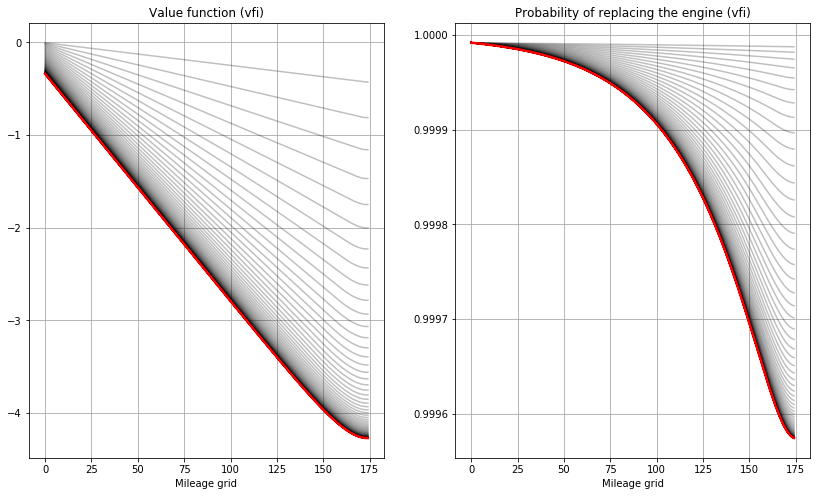

Rust model of bus engine replacement (id=140339543961744) solved with vfi in 123 iterations


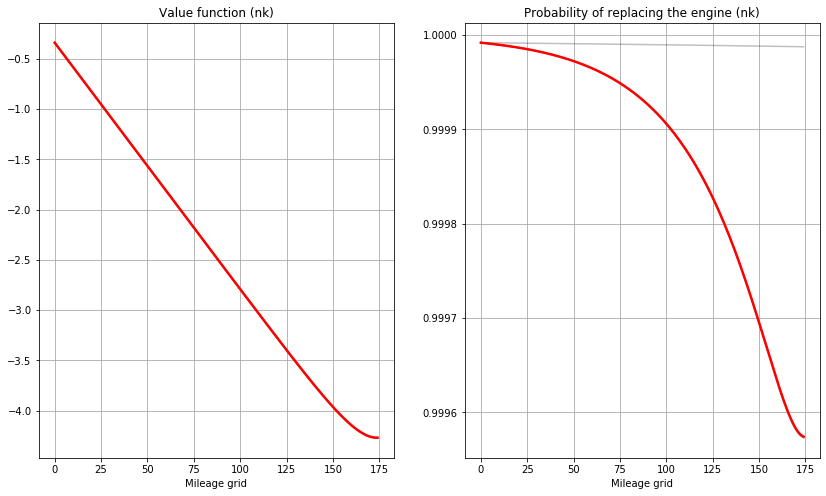

Rust model of bus engine replacement (id=140339543961744) solved with nk in 2 iterations

Max diff between value functions is  8.95709148851509e-06
Max diff between policy functions is 9.113154675333135e-12


In [2]:
# compare SA, NK
model = zurcher(beta=0.9)  # try different value of beta
ev1,pk1 = model.solve_show(maxiter=1500)
ev2,pk2 = model.solve_show(solver='nk')
print()
print('Max diff between value functions is ' ,np.amax(np.abs(ev1-ev2)))
print('Max diff between policy functions is',np.amax(np.abs(pk1-pk2)))

### Questions to think about

- Does VFI algorithm always converge?  
- What determines the speed of convergence of the VFI algorithm?  
- Does NK algorithm always converge?  

### Properties of VFI vs Newton-Kantorovich solution methods

- VFI is **globally convergent** (Bellman is contraction mappint $ \Rightarrow $ single fixed point)  
- VFI convergent rate is $ beta $, **very slow** in approaching the fixed point when \$beta\$ is close to one  


vs.

- Newton-Kantorovich has **quadratic convergence** rate  
- Newton-Kantorovich is **sensitive to starting point**  

In [3]:
# compare SA, NK
model = zurcher(beta=0.975)
ev1,pk1 = model.solve_show(maxiter=1500,verbosity=1,plot=False)
ev2,pk2 = model.solve_show(solver='nk',verbosity=1,plot=False)
print()
print('Max diff between value functions is ' ,np.amax(np.abs(ev1-ev2)))
print('Max diff between policy functions is',np.amax(np.abs(pk1-pk2)))

Solver = vfi
----------------------
iter              err
----------------------
   0       4.2728e-01
   1       4.1659e-01
   2       4.0617e-01
   3       3.9600e-01
   4       3.8608e-01
   5       3.7640e-01
   6       3.6696e-01
   7       3.5773e-01
   8       3.4873e-01
   9       3.3992e-01
  10       3.3131e-01
  11       3.2289e-01
  12       3.1464e-01
  13       3.0655e-01
  14       2.9862e-01
  15       2.9082e-01
  16       2.8316e-01
  17       2.7562e-01
  18       2.6820e-01
  19       2.6088e-01
  20       2.5366e-01
  21       2.4654e-01
  22       2.3952e-01
  23       2.3258e-01
  24       2.2576e-01
  25       2.1904e-01
  26       2.1242e-01
  27       2.0592e-01
  28       1.9954e-01
  29       1.9331e-01
  30       1.8722e-01
  31       1.8127e-01
  32       1.7549e-01
  33       1.6987e-01
  34       1.6443e-01
  35       1.5916e-01
  36       1.5408e-01
  37       1.4919e-01
  38       1.4448e-01
  39       1.3995e-01
  40       1.3560e-01
  41       1.3143

### Poly-algorithm

- NK method may not be convergent at the initial point  
- Successive apprizimataion (SA) iterations, however, are always convergent  


**Poly algorithm** is combination of SA and NK:

1. Start with SA iterations  
1. At approximately optimal time switch to NK iterations  

### When to switch to NK iterations?

Suppose $ EV_{k-1} = {EV}^\star + C $ (where $ {EV}^\star $ is the fixed point)

$$
err_{k} = ||EV_{k-1}-EV_{k}|| = ||{EV}^\star+C - T^*({EV}^\star+C)|| = ||{EV}^\star + C - {EV}^\star - \beta C|| = C (1-\beta)
$$

$$
err_{k+1} = ||EV_{k}-EV_{k+1}|| = ||T^*({EV}^\star+C) - T^*(T^*({EV}^\star+C))|| = ||{EV}^\star + \beta C - {EV}^\star - \beta^2 C|| = \beta C (1-\beta)
$$

- Then the ration of two errors $ \frac{err_{k+1}}{err_{k}} = \beta $ when the current approximation is a constant away from the fixed point.  
- NK iteration will immediately “strip away” the constant  


**Thus, switch to NK iteration when** $ \frac{err_{k+1}}{err_{k}} $ **is close to** $ \beta $

In [4]:
# when to switch from SA to NK
model = zurcher(beta=0.975)
model.solve_show(maxiter=1500,verbosity=2,plot=False);

Solver = vfi
------------------------------------------
   iter              err  err(i)/err(i-1)
------------------------------------------
   0 sa       4.2728e-01   0.427277667463
   1 sa       4.1659e-01   0.974985156037
   2 sa       4.0617e-01   0.974977898685
   3 sa       3.9600e-01   0.974967530759
   4 sa       3.8608e-01   0.974952914413
   5 sa       3.7640e-01   0.974932594839
   6 sa       3.6696e-01   0.974905009462
   7 sa       3.5773e-01   0.974867836074
   8 sa       3.4873e-01   0.974819168371
   9 sa       3.3992e-01   0.974756037945
  10 sa       3.3131e-01   0.974674240553
  11 sa       3.2289e-01   0.974575376329
  12 sa       3.1464e-01   0.974446349105
  13 sa       3.0655e-01   0.974300520436
  14 sa       2.9862e-01   0.974112724869
  15 sa       2.9082e-01   0.973904920662
  16 sa       2.8316e-01   0.973656096106
  17 sa       2.7562e-01   0.973365083189
  18 sa       2.6820e-01   0.973069628117
  19 sa       2.6088e-01   0.972704596040
  20 sa       2.536

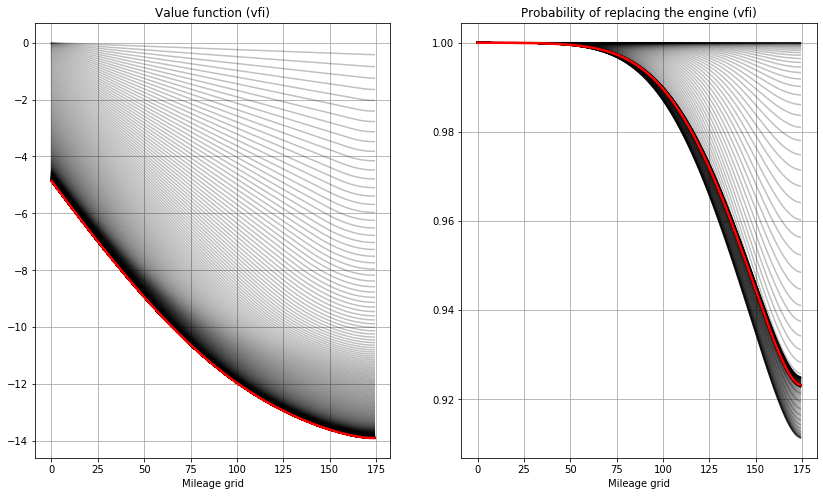

Rust model of bus engine replacement (id=140337928941072) solved with vfi in 860 iterations
Rust model of bus engine replacement (id=140337928941072) solved with nk in 7 iterations
Solver = poly
------------------------------------------
   iter              err  err(i)/err(i-1)
------------------------------------------
   0 sa       4.2728e-01   0.427277667463
   1 sa       4.1659e-01   0.974985156037
   2 sa       4.0617e-01   0.974977898685
   3 sa       3.9600e-01   0.974967530759
   4 sa       3.8608e-01   0.974952914413
   5 sa       3.7640e-01   0.974932594839
   6 sa       3.6696e-01   0.974905009462
   7 sa       3.5773e-01   0.974867836074
   8 sa       3.4873e-01   0.974819168371
   9 sa       3.3992e-01   0.974756037945
  10 sa       3.3131e-01   0.974674240553
  11 sa       3.2289e-01   0.974575376329
  12 sa       3.1464e-01   0.974446349105
  13 sa       3.0655e-01   0.974300520436
  14 sa       2.9862e-01   0.974112724869
  15 sa       2.9082e-01   0.973904920662
  16 

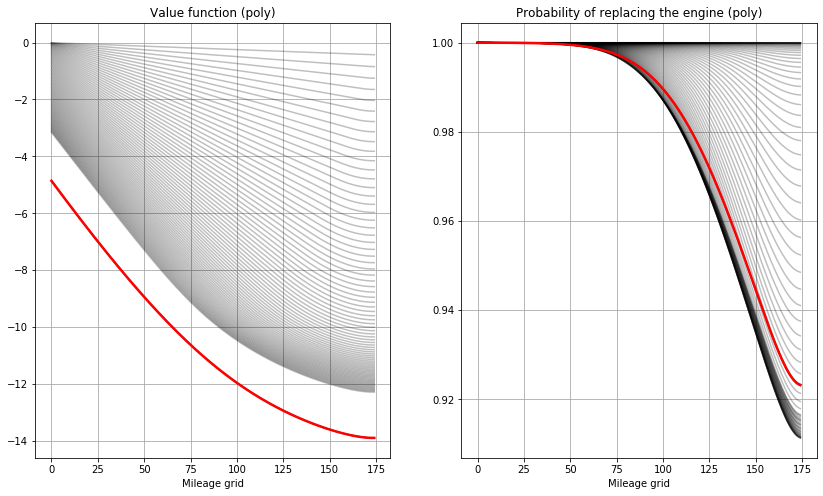

Rust model of bus engine replacement (id=140337928941072) solved with poly in 80 iterations


In [5]:
# compare SA, NK and polyalgorithm
m = zurcher(beta=0.975)
ev,pk = m.solve_show(tol=1e-10,maxiter=1500)
ev,pk = m.solve_show(tol=1e-10,solver='nk',plot=False)
polyset = {'sa_min':10,
           'sa_max':100,
           'switch_tol':0.000215,
          }
ev,pk = m.solve_show(tol=1e-10,verbosity=2,solver='poly',**polyset)

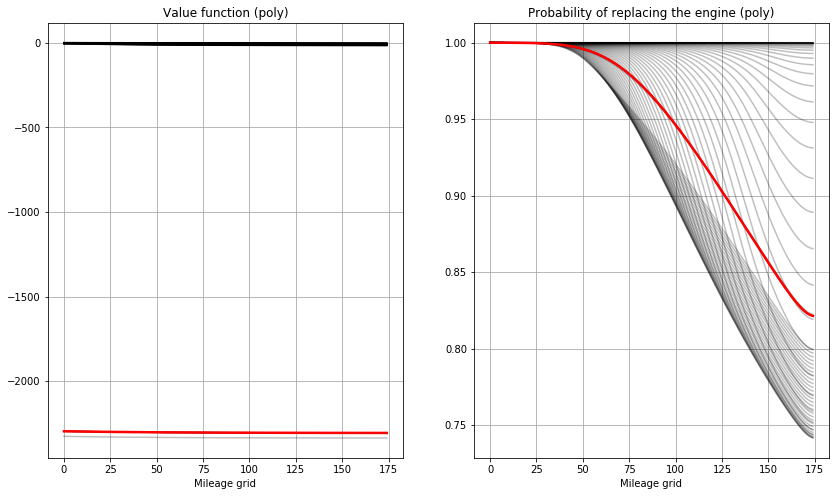

Rust model of bus engine replacement (id=140337656388112) solved with poly in 71 iterations
10.2 ms ± 377 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)


In [6]:
# original parameters from Rust 1987
m = zurcher()
polyset = {'sa_min':10,
           'sa_max':100,
           'switch_tol':0.0005,
          }
ev,pk = m.solve_show(tol=1e-10,solver='poly',**polyset)
# time the solver
%timeit -n 5 -r 10 m.solve_poly(tol=1e-10,**polyset)

#### Further learning resources

- 📖 John Rust (1987, Econometrica) “Optimal Replacement of GMC Bus Engines: An Empirical Model of Harold Zurcher”  
- details on Kantorovich theorem [https://en.wikipedia.org/wiki/Kantorovich_theorem](https://en.wikipedia.org/wiki/Kantorovich_theorem)  
- NFXP manual with detailed instructions on Fréchet derivative in Rust model  
- on convergence rate (order of convergence) [https://youtu.be/JTinepDn1dI](https://youtu.be/JTinepDn1dI)  